It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

# Prevent Overfitting: Regularization


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(0)

We will use the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), consisting of a collection of 28x28 pixel images corresponding in digits from 0 to 9 manuscripts. The purpose of this data set is to train models that recognize handwritten numbers.

We will train, therefore, an [OCR (Optical Character Recognition)](https://en.wikipedia.org/wiki/Optical_character_recognition) model for multiclass classification (numbers from 0 to 9).

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train[0].shape

(28, 28)

As they are 8-bit images, the colors (in this case only one channel, the gray channel) of each pixel are encoded with a value between 0 and 255, with 0 being black and 255 being white. It is usual to normalize the values to work with a range between 0.0 and 1.0.

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

We visualize a random image of the training set.

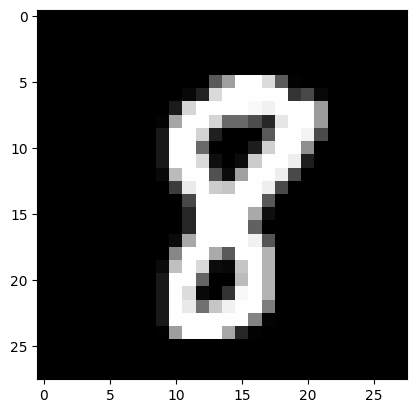

In [7]:
import numpy as np

i = np.random.randint(0, len(x_train))
plt.imshow(x_train[i], cmap='gray')
plt.show()

We reduce the dataset for  inducing more overfitting

In [8]:
from sklearn.model_selection import train_test_split
# split into train test sets
_, x, _, y = train_test_split(
    x_train, y_train, test_size=0.02, random_state=1, stratify=y_train)

num_classes = 10
from collections import Counter
x.shape, y.shape, Counter(y)

((1200, 28, 28),
 (1200,),
 Counter({np.uint8(2): 119,
          np.uint8(8): 117,
          np.uint8(6): 118,
          np.uint8(9): 119,
          np.uint8(3): 123,
          np.uint8(4): 117,
          np.uint8(0): 119,
          np.uint8(7): 125,
          np.uint8(5): 108,
          np.uint8(1): 135}))

#### Why do we need to use regularization?

We are going to assign the classes randomly to each image with random shuffle.

In [9]:
y_shuffle = np.copy(y)
np.random.shuffle(y_shuffle)
y[:5], y_shuffle[:5]

(array([2, 8, 6, 9, 3], dtype=uint8), array([0, 3, 6, 8, 7], dtype=uint8))

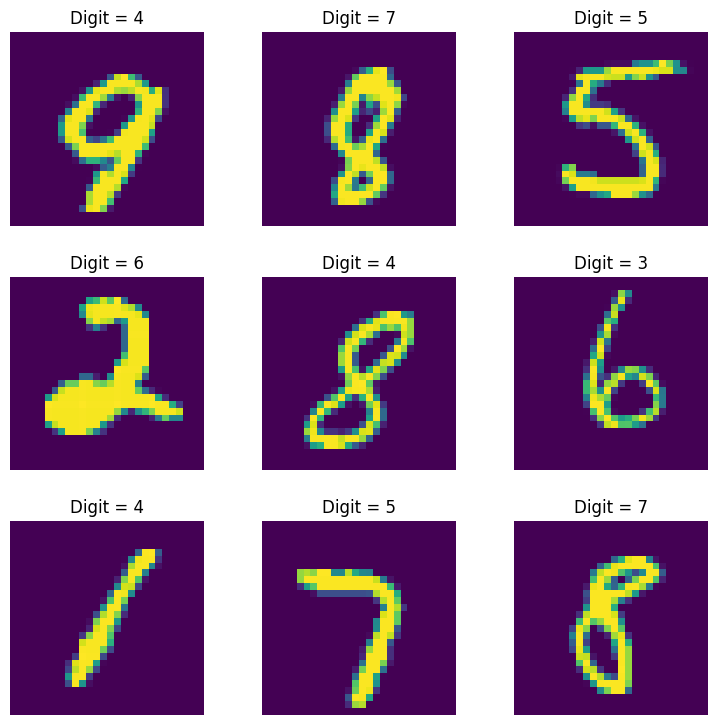

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in np.arange(0, 9):
    ind = np.random.randint(len(y_shuffle))
    axes[i].imshow(x[ind].reshape(28, 28))
    axes[i].set_title(
        f"Digit = {y_shuffle[ind]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.3)

Lets build a model for learning the new random classes

In [11]:
# Input
inputs = tf.keras.Input(shape=(28, 28))
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(64, activation='relu')(flat)
# hidden layer 2
l_2 = layers.Dense(64, activation='relu')(l_1)
# hidden layer 3
l_3 = layers.Dense(64, activation='relu')(l_2)

# Outputs
outputs = layers.Dense(10, activation='softmax')(l_3)

# Model definition
model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    x,
    y_shuffle,
    batch_size=64,
    epochs=100,
    shuffle=True
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.0852 - loss: 2.3168
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1623 - loss: 2.2731   
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2118 - loss: 2.2390 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2346 - loss: 2.1941 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2763 - loss: 2.1398 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2794 - loss: 2.0766
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3192 - loss: 2.0019 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3623 - loss: 1.9180 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4173 - loss: 1.8265 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4367 - loss: 1.7302 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4685 - loss: 1.6338 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [13]:
results = model.evaluate(x, y_shuffle, verbose=0)
print('Train Accuracy: {}'.format(results[1]))

Train Accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


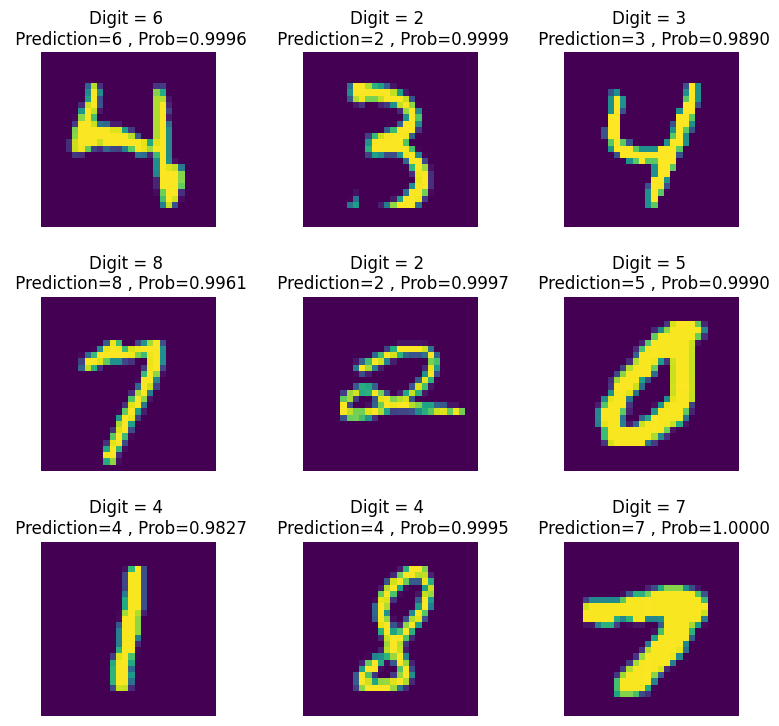

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in np.arange(0, 9):
    ind = np.random.randint(len(y_shuffle))
    pred_pobs = model.predict(np.expand_dims(x[ind], 0)).flatten()
    pred_class = np.argmax(pred_pobs)
    prob = np.max(pred_pobs)
    axes[i].imshow(x[ind].reshape(28, 28))
    axes[i].set_title(
        f"Digit = {y_shuffle[ind]} \n Prediction={pred_class} , Prob={prob:.4f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

We can see that the model has fully fitted the training set. It practically does not matter what data you introduce into the neural network, it will almost always fit. The objective is not to fit the training set, it is to **GENERALIZE**.

#### Regularization for preventing overfitting

To get the model to **generalize**, we can use one of the numerous regularization techniques

We build a model consisting of:

- Input with dimension (28,28)
- Flatten layer
- Dense hidden  layer with 256 neurons and ReLU as activation function
- Second dense hidden layer with 128 neurons and ReLU as activation function
- Third dense  hidden layer with 128 neurons and ReLU as activation function
- Output layer with a single neuron that implements the sigmoid function.

In [15]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model')

In [16]:
model.summary()

Model: "dont_overfit_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

We define the following configuration for training:
- **optimizer**: adam
- **loss function**: binary crossentropy
- **metrics**: accuracy

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.3639 - loss: 2.0500 - val_accuracy: 0.7708 - val_loss: 1.0753
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7889 - loss: 0.8253 - val_accuracy: 0.8458 - val_loss: 0.5160
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8762 - loss: 0.3757 - val_accuracy: 0.8417 - val_loss: 0.4800
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9196 - loss: 0.2402 - val_accuracy: 0.8708 - val_loss: 0.4381
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9669 - loss: 0.1636 - val_accuracy: 0.8833 - val_loss: 0.4009
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9756 - loss: 0.1044 - val_accuracy: 0.8792 - val_loss: 0.4250
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9807 - loss: 0.0899 - val_accuracy: 0.8875 - val_loss: 0.4419
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9647 - loss: 0.0957 - val_accuracy: 0.8875 - 

In [19]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5699883103370667
Test Accuracy: 0.9071000218391418


We visualize the evolution of the values in each epoch of the loss function and accuracy.

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [21]:
hist.head()

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.525000,1.789693,0.770833,1.075303,0
1,0.807292,0.695697,0.845833,0.516035,1
2,0.883333,0.348524,0.841667,0.479989,2
3,0.931250,0.221995,0.870833,0.438061,3
4,0.965625,0.157788,0.883333,0.400931,4


<a id='overfitting_results'></a>
When interpreting both graphs, it is evident that the model over-fits the training values and is not able to generalize well for the validation values. **It is a clear example of overfitting**.

The following function will be useful throughout the different practical examples.

In [22]:
import matplotlib.pyplot as plt

def show_loss_accuracy_evolution(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

def show_samples(x_test, y_test, model):
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, -1)

    L = 5
    W = 5
    fig, axes = plt.subplots(L, W, figsize=(14, 14))
    axes = axes.ravel()

    for i in np.arange(0, L * W):
        ind = np.random.randint(len(y_test))
        axes[i].imshow(x_test[ind].reshape(28, 28))
        prob_pred = np.max(predictions[ind, :])
        class_pred = int(predicted_classes[ind])
        original_class = int(y_test[ind])
        if class_pred == original_class:
            color = 'green'
        else:
            color = 'red'
        title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
        class_pred, original_class, prob_pred)
        axes[i].set_title(title, color=color)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

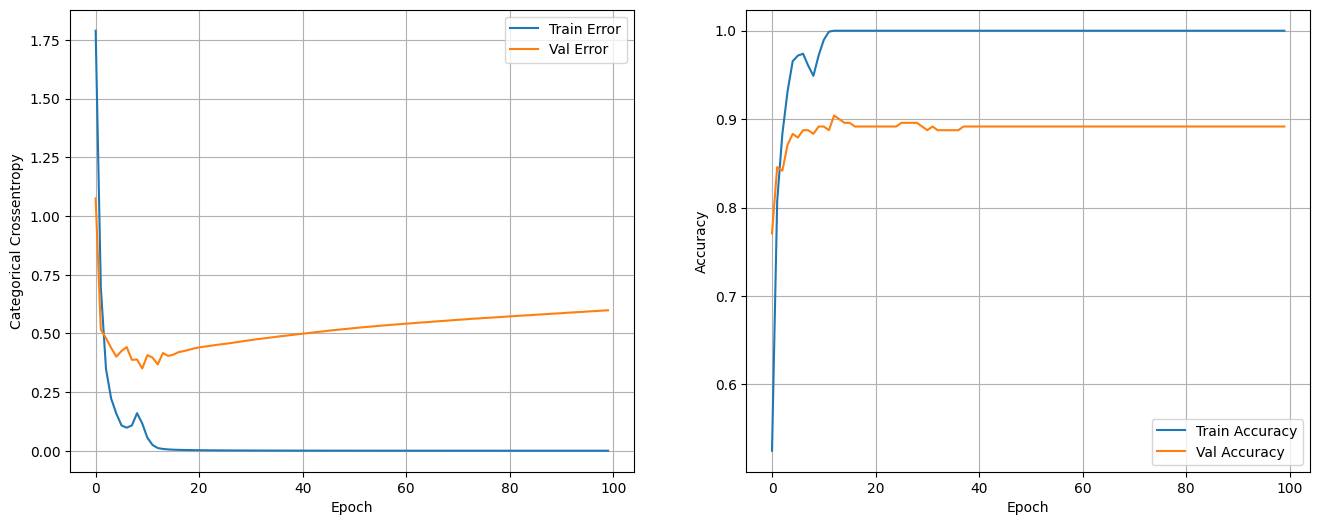

In [23]:
show_loss_accuracy_evolution(history)

In [24]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5699883103370667
Test Accuracy: 0.9071000218391418


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


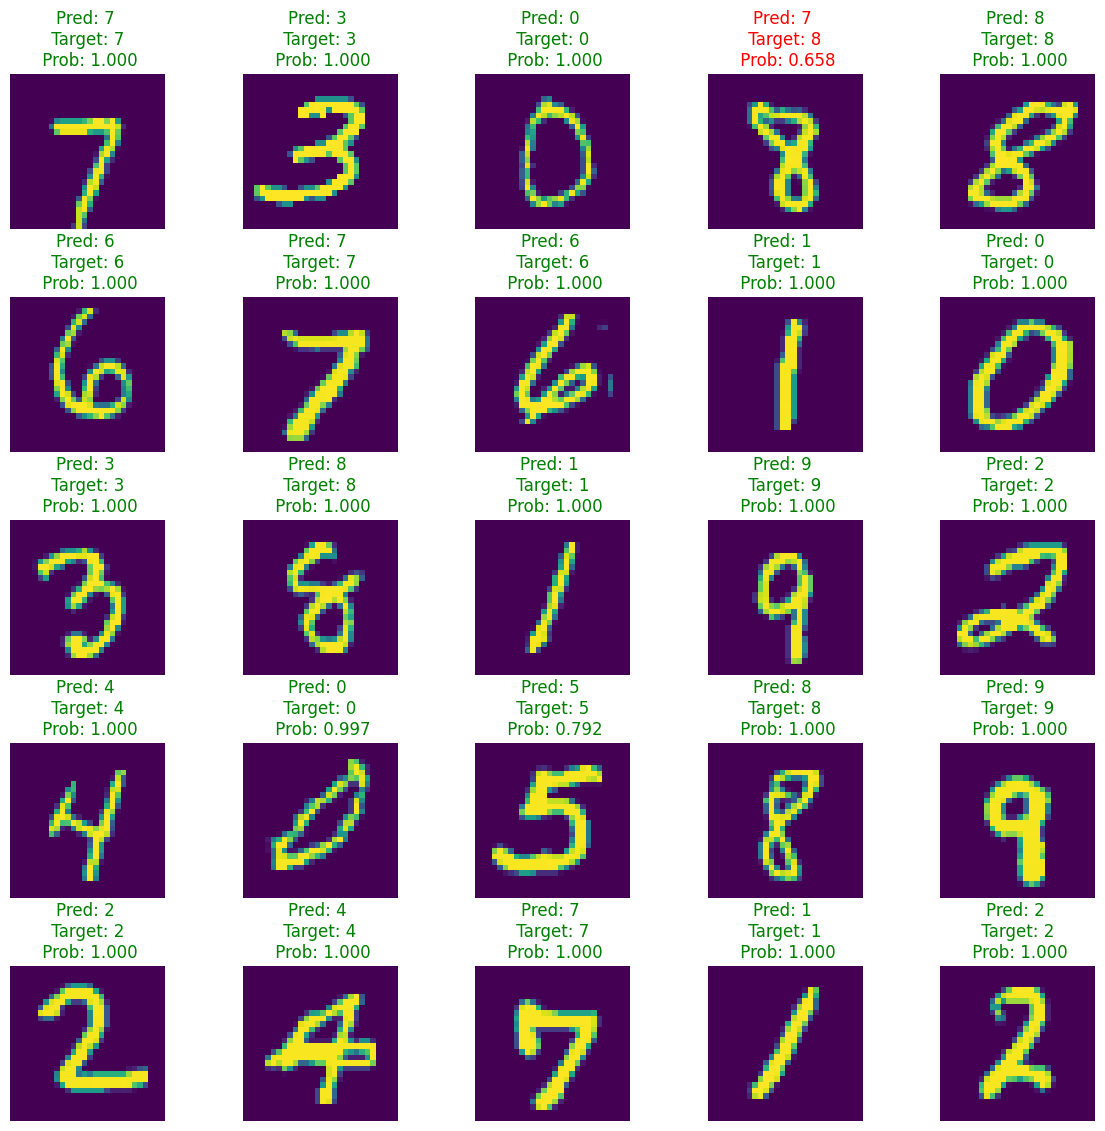

In [25]:
show_samples(x_test, y_test, model)

## Create a simpler model

The simplest way to prevent overfitting is to create  a simple model: A model with less number of  parameters (which is determined by the number of layers and the number of units per layer).

A more complex model with more parameters will have much more capacity and will be able to learn almost any training set. Deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

In [26]:
# Input layer
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
flat = layers.Flatten()(inputs)

# First hidden layer
l_1 = layers.Dense(8, activation='relu', name='layer_1')(flat)

# Output layer
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_1)
model_simpler = keras.Model(
    inputs=inputs, outputs=outputs, name='simpler_model')

model_simpler.summary()

Model: "simpler_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,370 (24.88 KB)

 Trainable params: 6,370 (24.88 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model_simpler.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
history_simpler = model_simpler.fit(x,
                                    y,
                                    batch_size=64,
                                    epochs=100,
                                    validation_split=0.25,
                                    shuffle=True)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.1659 - loss: 2.2483 - val_accuracy: 0.3367 - val_loss: 2.0660
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3269 - loss: 2.0080 - val_accuracy: 0.4067 - val_loss: 1.8826
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4133 - loss: 1.8157 - val_accuracy: 0.4667 - val_loss: 1.7293
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4725 - loss: 1.6582 - val_accuracy: 0.5233 - val_loss: 1.5910
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5759 - loss: 1.5205 - val_accuracy: 0.5933 - val_loss: 1.4702
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6370 - loss: 1.3943 - val_accuracy: 0.6700 - val_loss: 1.3605
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6913 - loss: 1.2743 - val_accuracy: 0.7067 - val_loss: 1.2513
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7515 - loss: 1.1543 - val_accuracy: 0.7333 - 

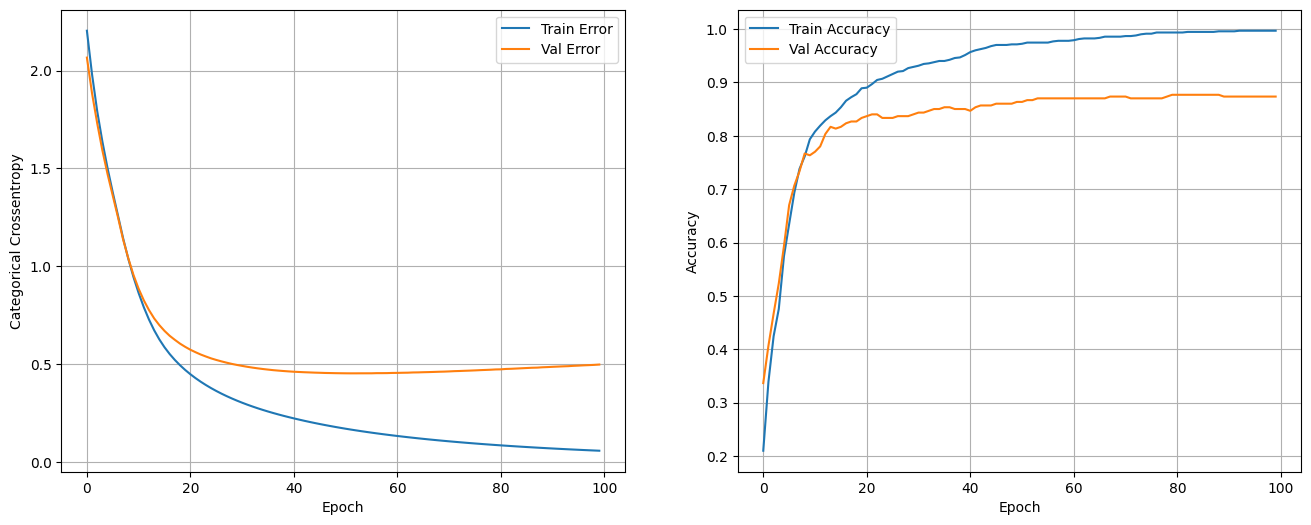

In [28]:
show_loss_accuracy_evolution(history_simpler)

In [29]:
results = model_simpler.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.49775049090385437
Test Accuracy: 0.8639000058174133


## Reduce batch_size

Other method is decreasing the `batch_size`during the gradient descend to add more uncertainty to the estimation of the parameter gradients, thus reducing the capacity of the model

In [30]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model')
## same model
model.summary()

Model: "dont_overfit_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2 = model.fit(
    x,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4777 - loss: 1.6748 - val_accuracy: 0.8500 - val_loss: 0.5356
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.4322 - val_accuracy: 0.8833 - val_loss: 0.4281
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9382 - loss: 0.2101 - val_accuracy: 0.8958 - val_loss: 0.3793
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9677 - loss: 0.1177 - val_accuracy: 0.8833 - val_loss: 0.4017
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9776 - loss: 0.0646 - val_accuracy: 0.8917 - val_loss: 0.4487
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9765 - loss: 0.0677 - val_accuracy: 0.8958 - val_loss: 0.4468
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.0520 - val_accuracy: 0.8792 - val_loss: 0.4390
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0159 - val_accuracy: 0.8958 - v

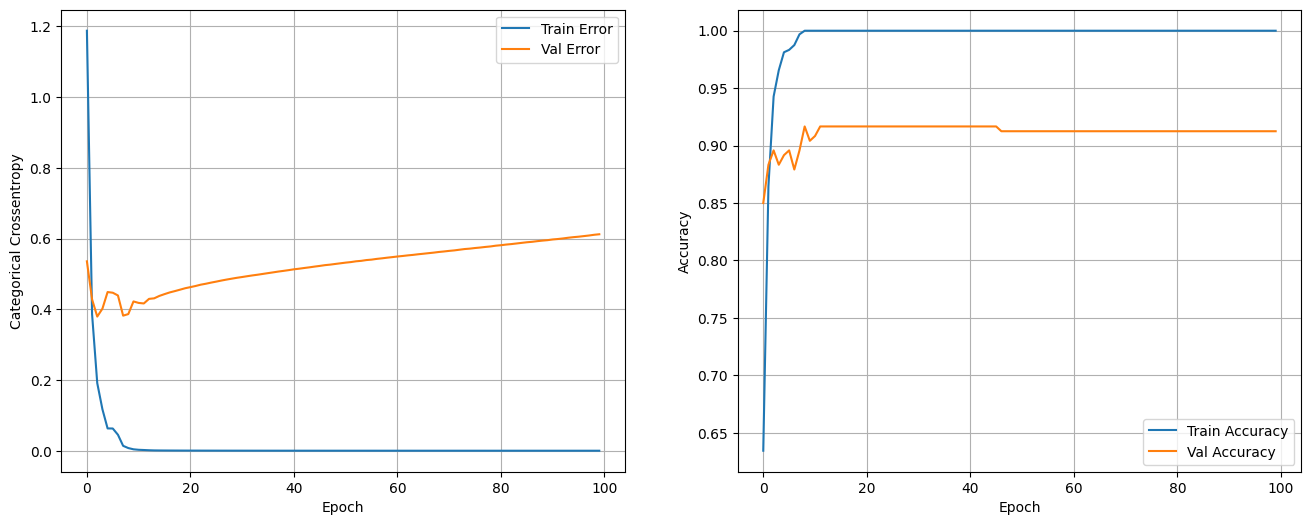

In [32]:
show_loss_accuracy_evolution(history_2)

In [33]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.6070178747177124
Test Accuracy: 0.9117000102996826


### Question 1:
#### What differences do you see if you change the batch_size to a lower or higher value? For example to 1 and to 512

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_3 = model.fit(
    x,
    y,
    batch_size=1,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9898 - loss: 0.0720 - val_accuracy: 0.9000 - val_loss: 1.7127
Epoch 2/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9728 - loss: 0.1505 - val_accuracy: 0.9042 - val_loss: 1.0522
Epoch 3/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9866 - loss: 0.0927 - val_accuracy: 0.9167 - val_loss: 0.9386
Epoch 4/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9772 - loss: 0.1426 - val_accuracy: 0.8875 - val_loss: 1.1239
Epoch 5/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9733 - loss: 0.1837 - val_accuracy: 0.9000 - val_loss: 0.7678
Epoch 6/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9959 - loss: 0.0166 - val_accuracy: 0.9125 - val_loss: 1.0238
Epoch 7/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0222 - val_accuracy: 0.9083 - val_loss: 1.0511
Epoch 8/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 4.7545e-05 - val_

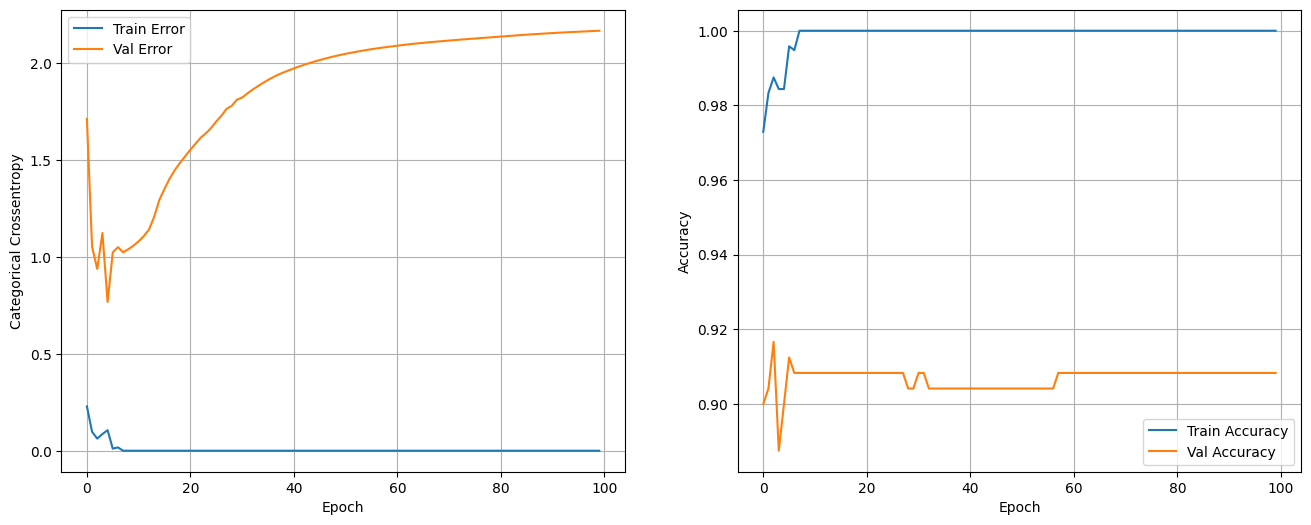

In [43]:
show_loss_accuracy_evolution(history_3)

In [44]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 2.184574842453003
Test Accuracy: 0.904699981212616


In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_4 = model.fit(
    x,
    y,
    batch_size=512,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9083 - val_loss: 2.1682
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9083 - val_loss: 2.1682
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9083 - val_loss: 2.1682
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9083 - val_loss: 2.1682
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9083 - val_loss: 2.1682
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9083 - val_loss: 2.1682
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9083 - val_loss: 2.1682
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - va

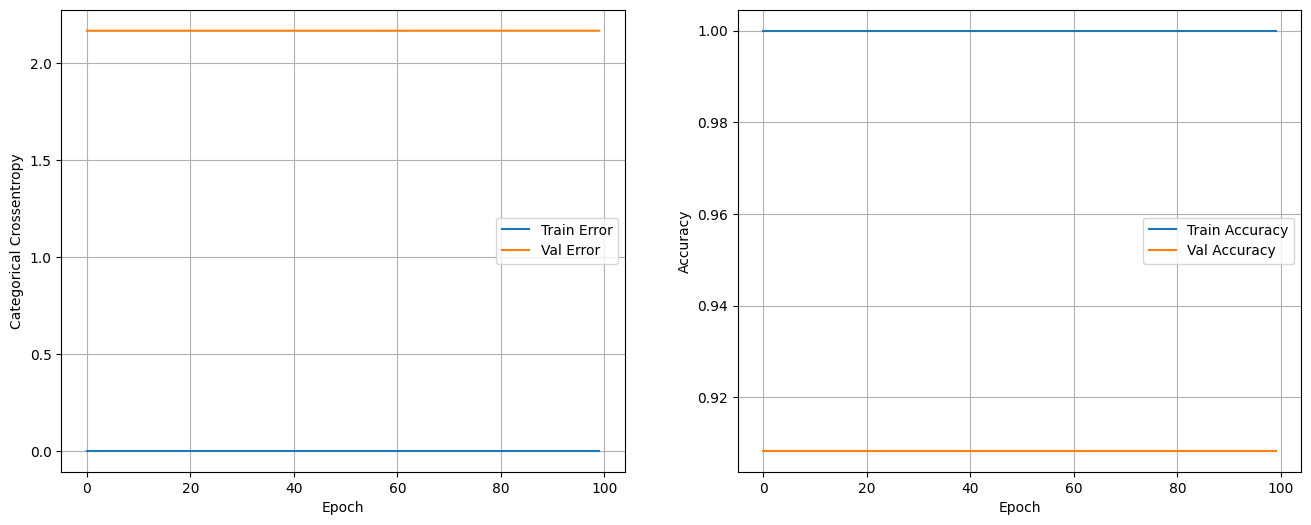

In [46]:
show_loss_accuracy_evolution(history_4)

In [47]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 2.18468976020813
Test Accuracy: 0.904699981212616


<a id='dropout'></a>
## Dropout

Dropout, applied to a layer, consists of randomly "dropping out" (set to zero) a number of output features of the layer during training with a probability **p** (`dropout rate`).

In `keras` you can introduce dropout in a network via the [Dropout layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout), which gets applied to the output of layer right before.

```python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

With Functional API:
```python
next_layer = layers.Dropout(0.4)(prev_layer)
```
With Sequential:
```python
model.add(layers.Dropout(0.4))
```

In [48]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

flat = layers.Dropout(0.5, name='dropout_flat')(flat)
# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.5, name='dropout_l1')(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.5, name='dropout_l2')(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.5, name='dropout_l3')(l_3)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_dropout = keras.Model(
    inputs=inputs, outputs=outputs, name='dont_overfit_model_dropout')

In [49]:
model_dropout.summary()

Model: "dont_overfit_model_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_flat (Dropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l1 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l2 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l3 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [51]:
history_dropout = model_dropout.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.1031 - loss: 2.4997 - val_accuracy: 0.2833 - val_loss: 2.2439
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1525 - loss: 2.2602 - val_accuracy: 0.4583 - val_loss: 2.1809
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1593 - loss: 2.1987 - val_accuracy: 0.5917 - val_loss: 2.0860
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2415 - loss: 2.1155 - val_accuracy: 0.6917 - val_loss: 1.8724
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2805 - loss: 1.9948 - val_accuracy: 0.7375 - val_loss: 1.5468
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3860 - loss: 1.7479 - val_accuracy: 0.7583 - val_loss: 1.2151
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4076 - loss: 1.6668 - val_accuracy: 0.7833 - val_loss: 1.0096
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4874 - loss: 1.4548 - val_accuracy: 0.8125 -

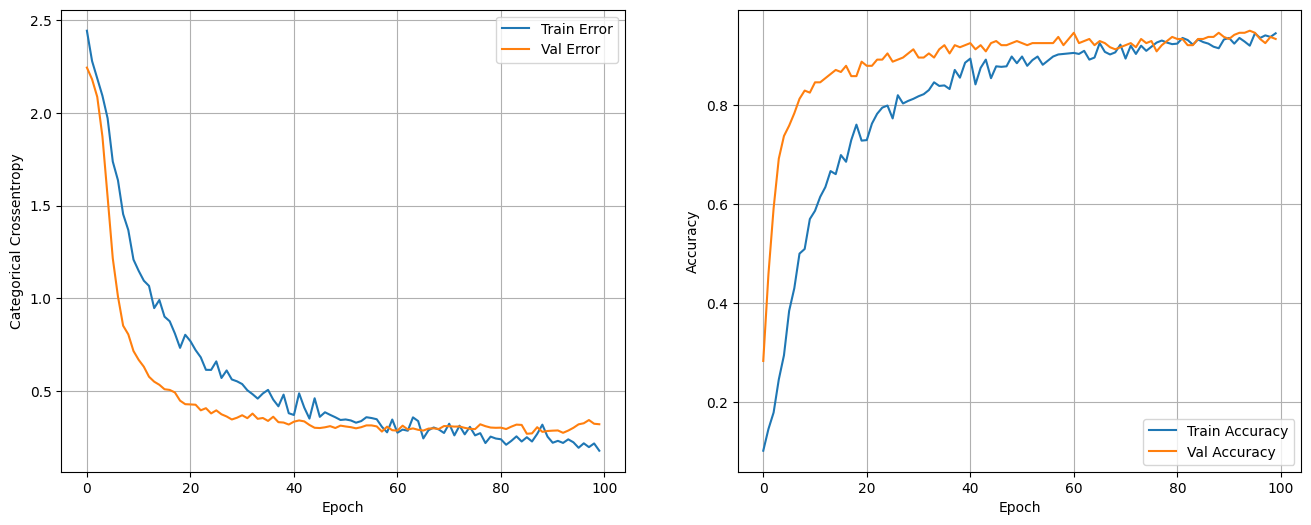

In [52]:
show_loss_accuracy_evolution(history_dropout)

In [53]:
results = model_dropout.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.30887141823768616
Test Accuracy: 0.9218999743461609


### Question 2:
#### What happens if you change the dropout to 0.1 or 0.9? And what if you put it only on one layer?
#### What happens if we delete the flatten first dropout?

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.2965 - loss: 2.0865 - val_accuracy: 0.7458 - val_loss: 1.1875
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6839 - loss: 1.0584 - val_accuracy: 0.8167 - val_loss: 0.6061
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7882 - loss: 0.6215 - val_accuracy: 0.8292 - val_loss: 0.5033
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8580 - loss: 0.4590 - val_accuracy: 0.8500 - val_loss: 0.4634
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9067 - loss: 0.3420 - val_accuracy: 0.8583 - val_loss: 0.4111
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9192 - loss: 0.2648 - val_accuracy: 0.8708 - val_loss: 0.4012
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9261 - loss: 0.2349 - val_accuracy: 0.8875 - val_loss: 0.3727
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9489 - loss: 0.1621 - val_accuracy: 0.8833

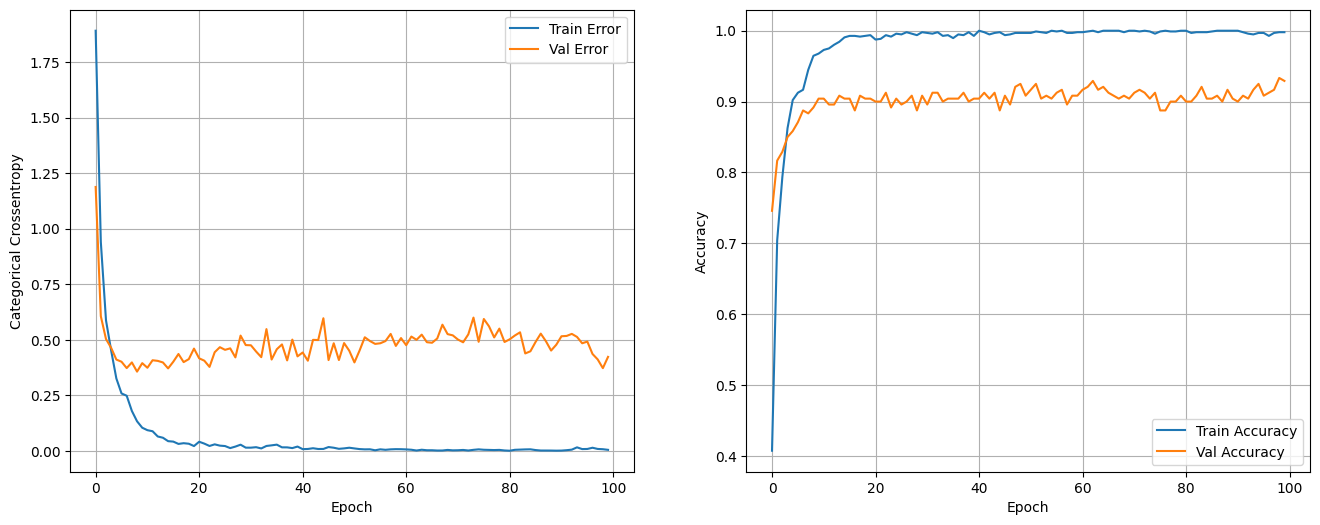

Test Loss with Dropout 0.1: 0.48176977038383484
Test Accuracy with Dropout 0.1: 0.9157999753952026


In [54]:
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

flat = layers.Dropout(0.1, name='dropout_flat')(flat) # Changed dropout rate to 0.1
# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.1, name='dropout_l1')(l_1) # Changed dropout rate to 0.1
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.1, name='dropout_l2')(l_2) # Changed dropout rate to 0.1
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.1, name='dropout_l3')(l_3) # Changed dropout rate to 0.1

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_dropout_0_1 = keras.Model(
    inputs=inputs, outputs=outputs, name='dont_overfit_model_dropout_0_1')

model_dropout_0_1.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

history_dropout_0_1 = model_dropout_0_1.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

show_loss_accuracy_evolution(history_dropout_0_1)

results_dropout_0_1 = model_dropout_0_1.evaluate(x_test, y_test, verbose=0)
print('Test Loss with Dropout 0.1: {}'.format(results_dropout_0_1[0]))
print('Test Accuracy with Dropout 0.1: {}'.format(results_dropout_0_1[1]))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.0905 - loss: 28.2445 - val_accuracy: 0.0833 - val_loss: 2.3183
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1078 - loss: 21.9355 - val_accuracy: 0.0958 - val_loss: 2.3132
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1078 - loss: 17.8531 - val_accuracy: 0.0750 - val_loss: 2.3106
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1103 - loss: 16.1933 - val_accuracy: 0.0583 - val_loss: 2.3085
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0932 - loss: 13.4319 - val_accuracy: 0.0542 - val_loss: 2.3073
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1014 - loss: 11.6787 - val_accuracy: 0.0500 - val_loss: 2.3066
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0834 - loss: 9.3332 - val_accuracy: 0.0583 - val_loss: 2.3067
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0982 - loss: 8.8299 - val_accuracy: 

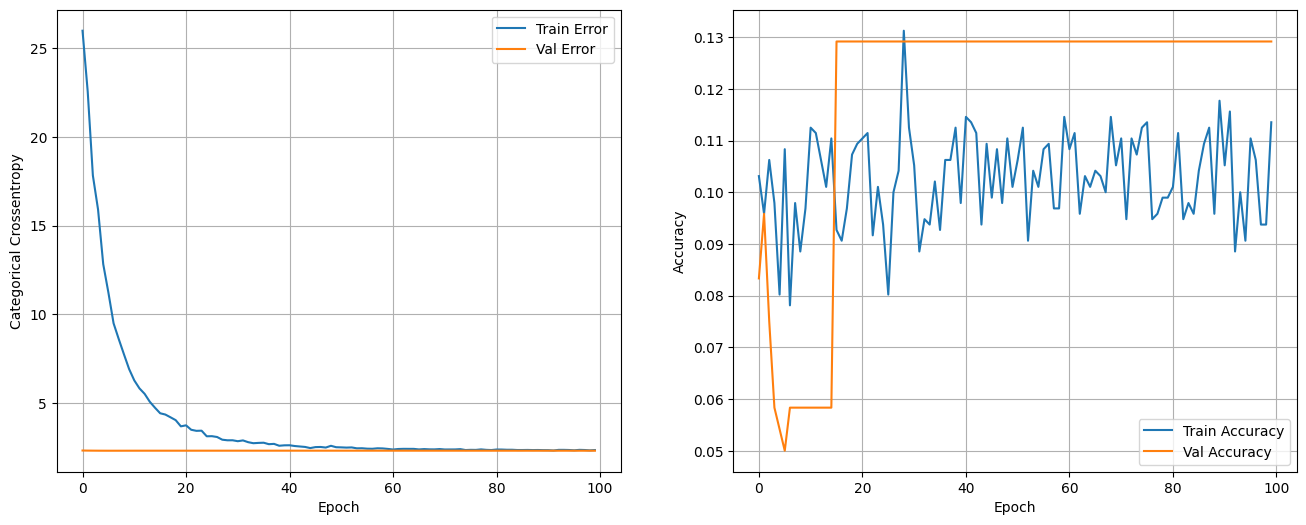

Test Loss with Dropout 0.9: 2.302690267562866
Test Accuracy with Dropout 0.9: 0.11349999904632568


In [55]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

flat = layers.Dropout(0.9, name='dropout_flat')(flat) # Changed dropout rate to 0.9
# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.9, name='dropout_l1')(l_1) # Changed dropout rate to 0.9
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.9, name='dropout_l2')(l_2) # Changed dropout rate to 0.9
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.9, name='dropout_l3')(l_3) # Changed dropout rate to 0.9

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_dropout_0_9 = keras.Model(
    inputs=inputs, outputs=outputs, name='dont_overfit_model_dropout_0_9')

model_dropout_0_9.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

history_dropout_0_9 = model_dropout_0_9.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

show_loss_accuracy_evolution(history_dropout_0_9)

results_dropout_0_9 = model_dropout_0_9.evaluate(x_test, y_test, verbose=0)
print('Test Loss with Dropout 0.9: {}'.format(results_dropout_0_9[0]))
print('Test Accuracy with Dropout 0.9: {}'.format(results_dropout_0_9[1]))

## Batch Normalization

[Batch normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.


With Functional API:
```python
next_layer = layers.BatchNormalization()(prev_layer)
```
With Sequential:
```python
model.add(layers.BatchNormalization())
```

In [57]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.BatchNormalization()(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.BatchNormalization()(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)




model_batch_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_batch_norm')

In [58]:
model_batch_norm.summary()

Model: "dont_overfit_model_batch_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,194 (989.04 KB)

 Trainable params: 252,426 (986.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [59]:
model_batch_norm.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
history_batch_norm = model_batch_norm.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.3565 - loss: 1.9616 - val_accuracy: 0.6917 - val_loss: 1.8020
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9159 - loss: 0.4056 - val_accuracy: 0.8083 - val_loss: 1.4526
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9794 - loss: 0.1689 - val_accuracy: 0.8500 - val_loss: 1.2511
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9999 - loss: 0.0737 - val_accuracy: 0.8667 - val_loss: 1.0954
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0378 - val_accuracy: 0.8625 - val_loss: 0.9662
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0227 - val_accuracy: 0.8625 - val_loss: 0.8577
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 0.8542 - val_loss: 0.7635
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.8500 

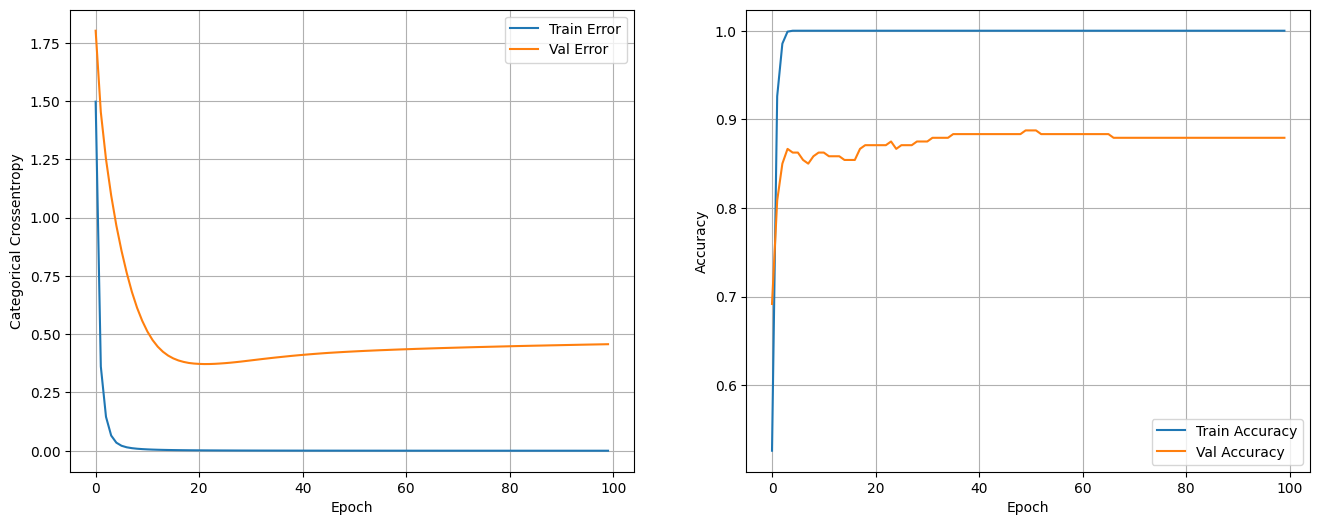

In [61]:
show_loss_accuracy_evolution(history_batch_norm)

In [62]:
results = model_batch_norm.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.41475799679756165
Test Accuracy: 0.900600016117096


## Layer Normalization

[Layer normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LayerNormalization) is another type of normalization technique. Unlike batch normalization, it normalizes the data across the features and is not dependent on the batch size, making it effective for both training and inference time normalization.

Layer normalization computes the mean and variance used for normalization from all of the summed inputs. It is applied elementwise, i.e., independently to each input in a layer on a single training example.

- With Functional API:
```python
next_layer = layers.LayerNormalization(axis=1)(prev_layer)
```

- With Sequential:
```python
model.add(layers.LayerNormalization(axis=1))
```

In [63]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')

# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# Hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.LayerNormalization(axis=1)(l_1)

# Hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.LayerNormalization(axis=1)(l_2)

# Hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Creating Model
model_layer_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_layer_norm')

In [64]:
model_layer_norm.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
history_layer_norm = model_layer_norm.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.4150 - loss: 1.7485 - val_accuracy: 0.8458 - val_loss: 0.6300
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9044 - loss: 0.4326 - val_accuracy: 0.8583 - val_loss: 0.4386
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9545 - loss: 0.1936 - val_accuracy: 0.8667 - val_loss: 0.3981
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9838 - loss: 0.0940 - val_accuracy: 0.8708 - val_loss: 0.3719
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9985 - loss: 0.0496 - val_accuracy: 0.8917 - val_loss: 0.3426
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9952 - loss: 0.0355 - val_accuracy: 0.8917 - val_loss: 0.3885
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9930 - loss: 0.0304 - val_accuracy: 0.8917 - val_loss: 0.3438
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9991 - loss: 0.0134 - val_accuracy: 0.8875 -

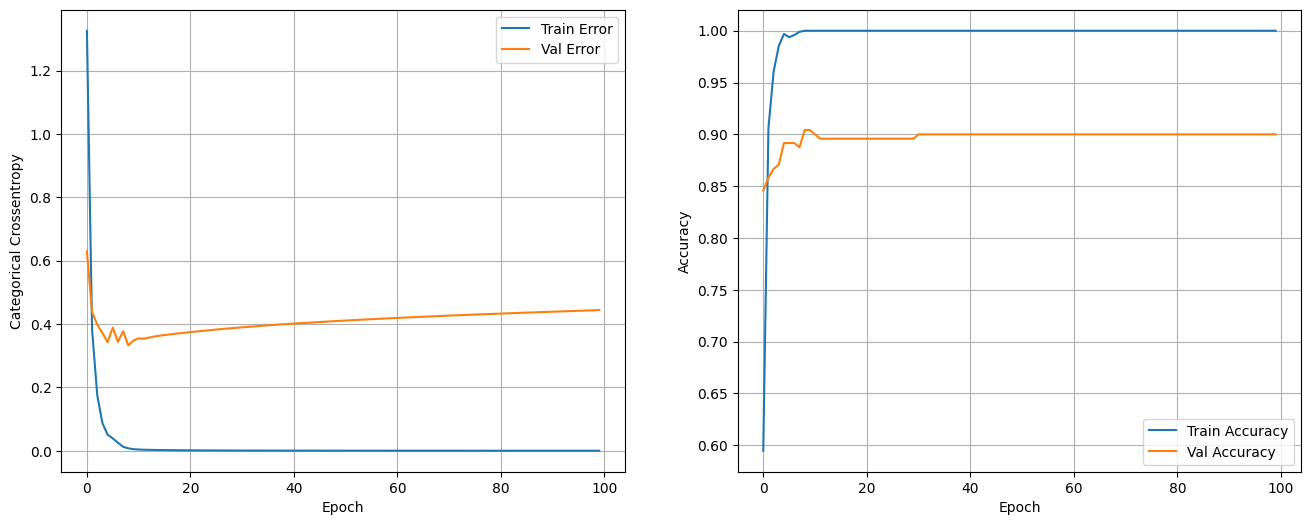

In [66]:
show_loss_accuracy_evolution(history_layer_norm)

In [67]:
results = model_layer_norm.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.44937843084335327
Test Accuracy: 0.9054999947547913


<a id='l1_l2_elasticnet'></a>
## L1, L2 and ElasticNet

Recordemos que durante el entrenamiento de la red se aprende la configuración de pesos y biases que permita mejorar los resultados para una determinada función de pérdida.

* [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization), where the cost added is proportional to the absolute value of the weights coefficients ("L1 norm" of the weights).

```python
tf.keras.regularizers.l1(l1=0.01)

layers.Dense(3, kernel_regularizer='l1')

```


* [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization), where the cost added is proportional to the square of the value of the weights coefficients ( "L2 norm" of the weights).

```python
tf.keras.regularizers.l2(l2=0.01)

layers.Dense(3, kernel_regularizer='l2')

```
* L1_L2 or Elastic Net.

```python
tf.keras.regularizers.l1_l2(
    l1=0.01, l2=0.01
)

layers.Dense(3, kernel_regularizer='l1_l2')

```

Furthermore, it is possible to choose whether to include the penalty in the cost function on the weights, the biases or on the activation, with the following arguments:
- `kernel_regularizer`: only on weights.
- `bias_regularizer`: only on biases.
- `activity_regularizer`: on full output.

[link to documentation](https://keras.io/api/layers/regularizers/).

In [68]:
from tensorflow.keras import regularizers

In [69]:
kerner_regularizer_l1 = regularizers.l1_l2(l1=1e-5, l2=5e-4)
kerner_regularizer_l2 = regularizers.l2(5e-4)
kerner_regularizer_l3 = regularizers.l1(1e-5)

In [70]:

# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu',
                   kernel_regularizer=kerner_regularizer_l1, name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l3, name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_regularizers = keras.Model(inputs=inputs,
                                 outputs=outputs,
                                 name='dont_overfit_model_regularizers')

In [71]:
model_regularizers.summary()

Model: "dont_overfit_model_regularizers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model_regularizers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
history_regularizers = model_regularizers.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.3201 - loss: 2.4163 - val_accuracy: 0.7458 - val_loss: 1.4256
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7656 - loss: 1.1856 - val_accuracy: 0.8333 - val_loss: 0.8173
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8961 - loss: 0.6803 - val_accuracy: 0.8625 - val_loss: 0.7536
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9246 - loss: 0.5226 - val_accuracy: 0.8542 - val_loss: 0.7870
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9388 - loss: 0.4675 - val_accuracy: 0.8667 - val_loss: 0.6829
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9638 - loss: 0.3850 - val_accuracy: 0.8708 - val_loss: 0.6382
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9671 - loss: 0.3573 - val_accuracy: 0.8875 - val_loss: 0.6308
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9815 - loss: 0.3151 - val_accuracy: 0.8667 -

Lets compare the weights norms of the model without regularization and with regularization.

In [74]:
for ly in model.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 41.87466049194336, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 21.818511962890625, shape:(256, 128), sparsity:0.0
L2 norm layer_3 weights: 17.069868087768555, shape:(128, 128), sparsity:0.0


In [75]:
for ly in model_regularizers.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 4.480654716491699, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 6.033797264099121, shape:(256, 128), sparsity:2.92
L2 norm layer_3 weights: 12.135080337524414, shape:(128, 128), sparsity:0.0


In [76]:
for ly in model_batch_norm.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 19.980222702026367, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 13.142190933227539, shape:(256, 128), sparsity:0.0
L2 norm layer_3 weights: 12.148682594299316, shape:(128, 128), sparsity:0.0


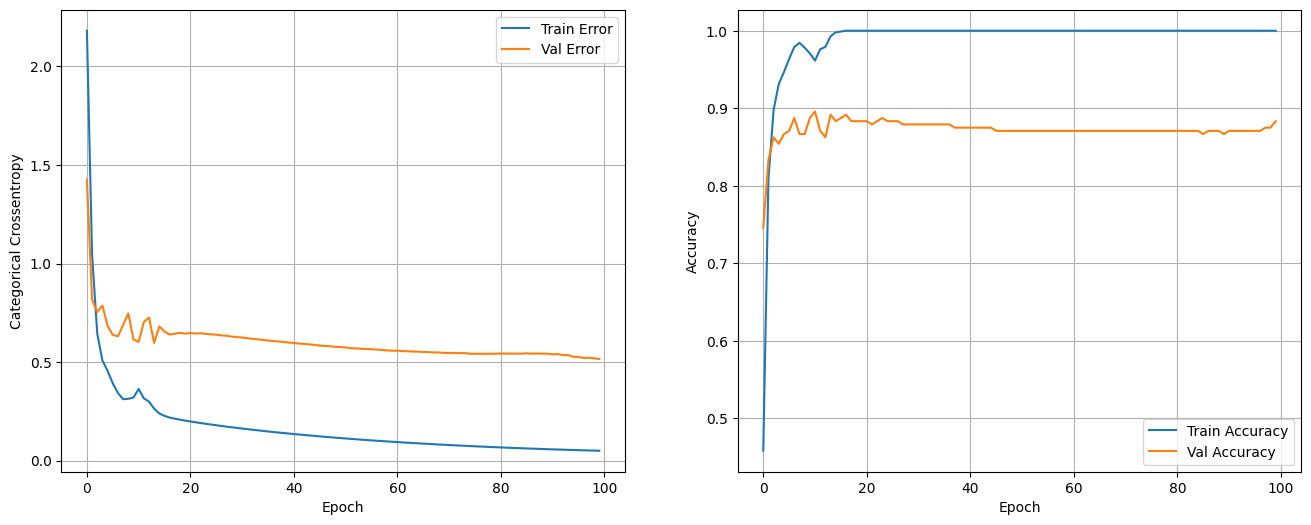

In [77]:
show_loss_accuracy_evolution(history_regularizers)

In [78]:
results = model_regularizers.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5288183689117432
Test Accuracy: 0.8935999870300293


### Question 3:
#### What happens if you change the regularizers?


In [86]:


# Define different regularizers

kerner_regularizer_l2_stronger = regularizers.l2(1e-3) # Example of a different L2 strength


# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1 with L1_L2
l_1 = layers.Dense(256, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_1')(flat)
# hidden layer 2 with a stronger L2
l_2 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2_stronger, name='layer_2')(l_1)
# hidden layer 3 with L1
l_3 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)

# Model definition with the new regularizers
model_regularizers_modified = keras.Model(inputs=inputs,
                                         outputs=outputs,
                                         name='dont_overfit_model_regularizers_modified')

model_regularizers_modified.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_regularizers_modified = model_regularizers_modified.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.3940 - loss: 2.4189 - val_accuracy: 0.7917 - val_loss: 1.2883
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8461 - loss: 1.0822 - val_accuracy: 0.8417 - val_loss: 0.8763
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8907 - loss: 0.7104 - val_accuracy: 0.8667 - val_loss: 0.7814
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9474 - loss: 0.5596 - val_accuracy: 0.8667 - val_loss: 0.7924
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9735 - loss: 0.4798 - val_accuracy: 0.8667 - val_loss: 0.7879
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9772 - loss: 0.4376 - val_accuracy: 0.8792 - val_loss: 0.7525
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9809 - loss: 0.4097 - val_accuracy: 0.8875 - val_loss: 0.6783
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9850 - loss: 0.3923 - val_accuracy: 0.8750 - 

In [87]:
for ly in model_regularizers.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 19.621549606323242, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 13.0866060256958, shape:(256, 128), sparsity:0.0
L2 norm layer_3 weights: 11.361067771911621, shape:(128, 128), sparsity:0.0


## Combine L2 Regularization, Dropout, LN BN

Use L2:
```python
kerner_regularizer_l2 = regularizers.l2(5e-4)
```
And Dropout:

```python
next_layer = layers.Dropout(0.4)(prev_layer)
```

In [ ]:
kerner_regularizer_l2 = ...

In [ ]:
inputs = tf.keras.Input(shape=(..., ), name='input_layer')

# Convert the 2D image to a vector
flat = layers....()(inputs)


# Add L2-normalization
l_1 = layers.Dense(128, activation='relu',
                   kernel_regularizer=...,
                   name='layer_1')(flat)

# Add dropout
l_1 = ...(l_1)


# Add L2-normalization
l_2 = layers.Dense(64,
                   activation='relu',
                   kernel_regularizer=...,
                   name='layer_2')(l_1)
# Add dropout
l_2 = ...(l_2)


# Add L2-normalization
l_3 = layers.Dense(32,
                   activation='relu',
                   kernel_regularizer=...,
                   name='layer_3')(l_2)

# Add dropout
l_3 = ...(l_3)


outputs = layers.Dense(..., activation=...,
                       name='output_layer')(l_3)

model_combination = keras.Model(inputs=inputs,
                                 outputs=outputs,
                                 name='dont_overfit_model_regularizers')

In [ ]:
model_combination.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

In [ ]:
history_combination = model_combination.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

In [ ]:
show_loss_accuracy_evolution(history_combination)

In [ ]:
results = model_combination.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

## Noise injection

Apply additive zero-mean Gaussian noise.

With Functional API:
```python
next_layer = layers.GaussianNoise(stddev)(prev_layer)
```
With Sequential:
```python
model.add(layers.GaussianNoise(stddev)())
```

In [ ]:
stddev = 2

# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.GaussianNoise(stddev, name='noise_l1')(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.GaussianNoise(stddev, name='noise_l2')(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.GaussianNoise(stddev, name='noise_l3')(l_3)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

model_noise = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_noise')

In [ ]:
model_noise.summary()

In [ ]:
model_noise.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_noise = model_noise.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

In [ ]:
show_loss_accuracy_evolution(history_noise)

In [ ]:
results = model_noise.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

<a id='early_stopping'></a>
## Early Stopping

Another of the most used techniques in neural network training is **early stopping**. It basically consists of stopping the training process in an Epoch prior to the one defined in the compilation.

This, in addition to resulting in a model with less overfitting, saves unnecessary computation time.

To do this, we can use the [Keras callbacks](https://keras.io/api/callbacks/), objects that perform actions at different times during training. Specifically, we will make use of [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/).

```python
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    restore_best_weights=True,
    verbose=0,
)
```

- **monitor**: Quantity to be monitored. Depending on the evolution, it will be decided to stop training.

- **min_delta**: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

- **patience**: Number of epochs with no improvement after which training will be stopped.

- **verbose**: verbosity mode.

There are other callbacks that can be very useful such as:
- [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/), which allows storing the state of a model at different times of training. This is very useful in trainings that can take hours or days.
- [`TensorBoard`](https://keras.io/api/callbacks/tensorboard/), which allows the use of [TensorBoard](https://www.tensorflow.org/tensorboard?hl=es-419), framework TensorFlow for visualizing metrics and evaluating models.

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=5,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    restore_best_weights=True,
    verbose=1)

Lets create the same model:

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

model_early_stopping = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_early_stopping')

In [ ]:
model_early_stopping.summary()

In [ ]:
model_early_stopping.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

In [ ]:
history_early_stopping = model_early_stopping.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True,
    callbacks=[es_callback]
)

In [ ]:
show_loss_accuracy_evolution(history_early_stopping)

In [ ]:
results = model_early_stopping.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

<a id='tensorboard'></a>
# TensorBoard



[TensorBoard](https://www.tensorflow.org/tensorboard) is a set of TensorFlow tools that allows us to represent the evolution and results of the training.

In order to introduce this tool, the following is a notebook from the [TensorFlow tutorial on TensorBoard](https://www.tensorflow.org/tensorboard/get_started).

Load TensorBoard notebook extension.

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime


We build the model. The input layer will have a dimension of `28x28`. The output layer, in a multiclass classification problem with 10 possible classes, will be made up of 10 neurons with [softmax activation function](https://keras.io/api/layers/activations/#softmax-function ).


In [ ]:
kernel_regularizer_l2 = keras.regularizers.l2(5e-4)

model = tf.keras.models.Sequential(name="tensorboard_model")
model.add(layers.Flatten(input_shape=(28, 28)))

# Hidden Layer + regularization
model.add(layers.Dense(64, activation='relu', name='layer_1'))
model.add(layers.Dense(64, activation='relu',
                       kernel_regularizer=kernel_regularizer_l2, name='layer_2'))
# output layer
model.add(layers.Dense(10, activation='softmax', name='output_layer'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In the [example with early stopping](#early_stopping) the Keras callbacks were presented. To use TensorBoard we will need to include the [`TensorBoard` callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) to the training.

This callback will create and store the logs in the directory that we indicate.

By default it will create a directory called "logs" in the directory where this notebook is running.

In [ ]:
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    restore_best_weights=True,
    verbose=1)

Train the model

In [ ]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    callbacks=[tensorboard_callback, es_callback]
)

In [ ]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

To ** start TensorBoard ** we can execute the following cell or, from the command line, execute:

    tensorboard --logdir logs / fit

An application will be launched that will be listening by default on port 6006. It is possible to use TensorBoard by opening [localhost: 6006 /](http://localhost:6006/) in a browser.

In [ ]:
%tensorboard --logdir logs/fit

A brief overview of the dashboards shown (tabs in top navigation bar):

* The **Scalars** dashboard shows how the loss and metrics change with every epoch. You can use it to also track training speed, learning rate, and other scalar values.
* The **Graphs** dashboard helps you visualize your model. In this case, the Keras graph of layers is shown which can help you ensure it is built correctly.
* The **Distributions** and **Histograms** dashboards show the distribution of a Tensor over time. This can be useful to visualize weights and biases and verify that they are changing in an expected way.



### Improve the last model with some regularization techniques to obtain at least `0.98` of test accuracy

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))

## Hidden Layer + regularization
model.add(...)
### output layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=5,
    validation_split=0.2,
    batch_size=64
)
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [ ]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=...,
    validation_split=0.2,
    batch_size=...,
    callbacks=...
)
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

### Plotting Predictions

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, -1)

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(14, 14))
axes = axes.ravel()

for i in np.arange(0, L * W):
    ind = np.random.randint(len(y_test))
    axes[i].imshow(x_test[ind].reshape(28, 28))
    prob_pred = np.max(predictions[ind, :])
    class_pred = int(predicted_classes[ind])
    original_class = int(y_test[ind])
    if class_pred == original_class:
        color = 'green'
    else:
        color = 'red'
    title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
    class_pred, original_class, prob_pred)
    axes[i].set_title(title, color=color)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)